In [1]:
from mc_moea import *

INFO: Pandarallel will run on 10 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [2]:
import imageio

In [3]:
import pickle
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [4]:
fname_l = glob.glob("solutions/*.pkl.bz2")

In [23]:
solutions = pd.read_pickle("solutions/solution-1000.pkl.bz2")

In [24]:
solutions

,solution_id,solution_obj,from_generation,from_method,signal_strength,construction_cost,num_orphans,fitness_value
0,a1400162-fd5f-4564-8393-c7e93066bdd0,Solution : a1400162-fd5f-4564-8393-c7e93066bdd...,999,Mutation,-97.556315,10440000,0,1.147876
1,7d26d624-6ba4-4aad-b6a8-5adad7b28117,Solution : 7d26d624-6ba4-4aad-b6a8-5adad7b2811...,999,Mutation,-97.581449,10440000,0,1.148104
2,a0cba035-31bf-48aa-8a9c-1ac29b76d1db,Solution : a0cba035-31bf-48aa-8a9c-1ac29b76d1d...,999,Mutation,-97.581449,10440000,0,1.148104
3,e6341d4f-ac51-4660-8b94-8f9161f28c47,Solution : e6341d4f-ac51-4660-8b94-8f9161f28c4...,999,Mutation,-97.648610,10440000,0,1.148715
4,feaa2355-8cad-460a-af65-bb192668c62a,Solution : feaa2355-8cad-460a-af65-bb192668c62...,997,Crossover,-98.505421,10160000,0,1.149504
...,...,...,...,...,...,...,...,...
295,634172c7-35a0-4176-9be9-d3feef9e2b5c,Solution : 634172c7-35a0-4176-9be9-d3feef9e2b5...,1000,Crossover,-100.124262,9820000,300,1.455721
296,be4fe314-6c7e-4de7-9d54-ac9d8dfcc23b,Solution : be4fe314-6c7e-4de7-9d54-ac9d8dfcc23...,1000,Mutation,-100.535757,21780000,0,1.458461
297,9b651c0c-33c6-4684-92a1-d456292def18,Solution : 9b651c0c-33c6-4684-92a1-d456292def1...,1000,Crossover,-100.734999,9820000,300,1.461273
298,543ce218-f49b-47ca-a6bc-c4973a43d2d4,Solution : 543ce218-f49b-47ca-a6bc-c4973a43d2d...,1000,Crossover,-101.387943,9820000,300,1.467209


In [25]:
pos = np.array([[s.x, s.y] for s in solutions["solution_obj"].iloc[0].stations])

Text(0.5, 1.0, 'Pattern I (P = 0.32)')

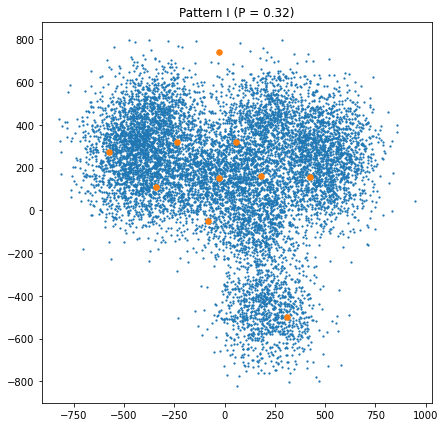

In [27]:
pos = np.array([[s.x, s.y] for s in solutions["solution_obj"].iloc[0].stations])
plt.figure(figsize=(7,7))
plt.scatter(data[1][:,0], data[1][:,1], s=1.5)
plt.scatter(pos[:,0], pos[:,1], s=30)
plt.title("Pattern I (P = 0.32)")

In [22]:
for i in tqdm(range(solutions.shape[0])):
    pos = np.array([[s.x, s.y] for s in solutions["solution_obj"].iloc[i].stations])
    plt.figure(figsize=(7,7))
    plt.scatter(data[0][:,0], data[0][:,1], s=1.5)
    plt.scatter(pos[:,0], pos[:,1], s=30)
    plt.title(f"Fitness: {solutions['solution_obj'].iloc[i].fitness:.4f}")
    plt.suptitle(f'Solutions from Iter: {i:04d}', fontsize=16)
    plt.savefig(f"figure/test/output-{i:04d}.png")
    plt.close()

  0%|          | 0/20 [00:00<?, ?it/s]

---

In [19]:
data = []
fnames = glob.glob("position/*.dat")
for fname in fnames:
    X = pickle.load(open(fname, "rb"))
    data.append(X)

In [20]:
bound_max = 800
bound_min = -800

In [29]:
for i in tqdm(range(solutions.shape[0])):
    pos = np.array([[s.x, s.y] for s in solutions["solution_obj"].iloc[i].stations])
    fig, axs = plt.subplots(2,3, figsize=(17,10), sharex=True, sharey=True)
    fig.suptitle(f'Solutions from Iter: {i:04d}', fontsize=16)
    plt.xlim(-900, 900)
    plt.ylim(-900, 900)

    axs[0][0].scatter(data[0][:,0], data[0][:,1], s=1.5)
    axs[0][0].scatter(pos[:,0], pos[:,1], s=30)
    axs[0][0].set_title("Pattern I (P = 0.32)")

    axs[0][1].scatter(data[1][:,0], data[1][:,1], s=1.5)
    axs[0][1].scatter(pos[:,0], pos[:,1], s=30)
    axs[0][1].set_title("Pattern II (P = 0.25)")

    axs[0][2].scatter(data[2][:,0], data[2][:,1], s=1.5)
    axs[0][2].scatter(pos[:,0], pos[:,1], s=30)
    axs[0][2].set_title("Pattern III (P = 0.17)")

    axs[1][0].scatter(data[3][:,0], data[3][:,1], s=1.5)
    axs[1][0].scatter(pos[:,0], pos[:,1], s=30)
    axs[1][0].set_title("Pattern IV (P = 0.14)")

    axs[1][1].scatter(data[4][:,0], data[4][:,1], s=1.5)
    axs[1][1].scatter(pos[:,0], pos[:,1], s=30)
    axs[1][1].set_title("Pattern V (P = 0.09)")

    axs[1][2].scatter(data[5][:,0], data[5][:,1], s=1.5)
    axs[1][2].scatter(pos[:,0], pos[:,1], s=30)
    axs[1][2].set_title("Pattern VI (P = 0.03)")

    plt.savefig(f"figure/iter_best_001-{i:04d}.png")
    plt.close()

  0%|          | 0/101 [00:00<?, ?it/s]

In [32]:
with imageio.get_writer('figure/iter_best_001-animated.gif', mode='I', duration = 0.5) as writer:
    for filename in sorted(glob.glob("figure/iter_best_001*.png")):
        image = imageio.imread(filename)
        writer.append_data(image)

/tmp/ipykernel_255203/2258210362.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


In [4]:
solutions = pd.read_pickle("solutions/solution-0760.pkl.bz2")

In [9]:
solutions.groupby("from_generation")[["solution_id"]].count().sort_index()

,solution_id
from_generation,
422,1
432,1
438,1
445,1
452,1
...,...
755,2
757,2
758,6
